In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Understanding, Cleaning and Manipulation

In [2]:
# import dataset and create dataframe
df_loan = pd.read_csv('loan.csv')

C:\Users\varni\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# checking column 47
df_loan.iloc[:, 47:48]

,next_pymnt_d
0,NaN
1,NaN
2,NaN
3,NaN
4,Jun-16
...,...
39712,NaN
39713,NaN
39714,NaN
39715,NaN


In [4]:
# checking for null values
df_loan['next_pymnt_d'].isnull().sum()

38577

In [5]:
# approximately 97% of values for next_pymnt_d column are null hence dropping this column
df_loan = df_loan.drop(['next_pymnt_d'], axis = 1)

# shape of dataframe
df_loan.shape

(39717, 110)

In [6]:
# as mentioned in case study and explained in the session as well, objective here is to identify strong indicators of defaulters
# loan_status = Current, indicates that borrower is still paying the loan and will either be a Fully Paid or Charged Off in the future
# but at this point of time it is unsure
# hence, remove rows having loan_status = Current
df_loan = df_loan[df_loan['loan_status'] != 'Current']

# check the shape of dataframe again
df_loan.shape

(38577, 110)

In [7]:
# summary of dataframe
df_loan.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 110 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38577 non-null  int64  
 1   member_id                       38577 non-null  int64  
 2   loan_amnt                       38577 non-null  int64  
 3   funded_amnt                     38577 non-null  int64  
 4   funded_amnt_inv                 38577 non-null  float64
 5   term                            38577 non-null  object 
 6   int_rate                        38577 non-null  object 
 7   installment                     38577 non-null  float64
 8   grade                           38577 non-null  object 
 9   sub_grade                       38577 non-null  object 
 10  emp_title                       36191 non-null  object 
 11  emp_length                      37544 non-null  object 
 12  home_ownership                 

In [8]:
# while looking at the columns having zero non-null values, I observed the following:
# eight columns have same values across all their rows: 
#policy_code = 1, application_type = INDIVIDUAL, acc_now_delinq = 0, delinq_amnt = 0, initial_list_status = f, pymnt_plan = n, out_prncp = 0, out_prncp_inv = 0

# three columns have either same values across all their rows or having null values: 
#collections_12_mths_ex_med = 0 or NA, chargeoff_within_12_mths = 0 or NA, tax_liens = 0 or NA

# three columns with high null values: 
#mths_since_last_record with 92.90% null values, mths_since_last_delinq with 64.56% null values, desc with 32.47% null values

# hence these columns will not be useful in finding any pattern
# drop these fourteen columns and zero non-null values columns in three steps
df_loan = df_loan.drop(df_loan.iloc[:, 48: 104], axis = 1)

# check the summary of dataframe again
df_loan.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38577 non-null  int64  
 1   member_id                   38577 non-null  int64  
 2   loan_amnt                   38577 non-null  int64  
 3   funded_amnt                 38577 non-null  int64  
 4   funded_amnt_inv             38577 non-null  float64
 5   term                        38577 non-null  object 
 6   int_rate                    38577 non-null  object 
 7   installment                 38577 non-null  float64
 8   grade                       38577 non-null  object 
 9   sub_grade                   38577 non-null  object 
 10  emp_title                   36191 non-null  object 
 11  emp_length                  37544 non-null  object 
 12  home_ownership              38577 non-null  object 
 13  annual_inc                  385

In [9]:
# remove rest of the columns
df_loan = df_loan.drop(df_loan.iloc[:, 49:], axis = 1)
df_loan = df_loan.drop(df_loan.columns[[17, 19, 28, 29, 35, 36, 37]], axis = 1)

# check dataframe
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0


In [10]:
# check for unique values in id column
len(df_loan.id.unique())

38577

In [11]:
# check for unique values in member_id column
len(df_loan.member_id.unique())

38577

In [12]:
# id and member_id columns have all unique values hence these columns would not be helpful in identifying any pattern
# only unique information in url column is "id" which is already present in a seperate column "id" hence it is redundent
# purpose and title have similar information hence one of them is redundent
# because title is entered by customers hence it may contain random data which might not be useful

# remove id, member_id, url, and title columns
df_loan = df_loan.drop(['id', 'member_id', 'url', 'title'], axis = 1)

# check the summary of dataframe again
df_loan.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                38577 non-null  int64  
 1   funded_amnt              38577 non-null  int64  
 2   funded_amnt_inv          38577 non-null  float64
 3   term                     38577 non-null  object 
 4   int_rate                 38577 non-null  object 
 5   installment              38577 non-null  float64
 6   grade                    38577 non-null  object 
 7   sub_grade                38577 non-null  object 
 8   emp_title                36191 non-null  object 
 9   emp_length               37544 non-null  object 
 10  home_ownership           38577 non-null  object 
 11  annual_inc               38577 non-null  float64
 12  verification_status      38577 non-null  object 
 13  issue_d                  38577 non-null  object 
 14  loan_status           

In [13]:
# as explained in the session, customer behaviour variables are not available at the time of loan application
# hence they can't be used for this analysis because here the objective is to identify strong indicators of defaulters

# remove columns from index 19 to 36
df_loan = df_loan.drop(df_loan.iloc[:, 19:37], axis = 1)

# check the summary of dataframe again
df_loan.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   funded_amnt_inv       38577 non-null  float64
 3   term                  38577 non-null  object 
 4   int_rate              38577 non-null  object 
 5   installment           38577 non-null  float64
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   emp_title             36191 non-null  object 
 9   emp_length            37544 non-null  object 
 10  home_ownership        38577 non-null  object 
 11  annual_inc            38577 non-null  float64
 12  verification_status   38577 non-null  object 
 13  issue_d               38577 non-null  object 
 14  loan_status           38577 non-null  object 
 15  purpose            

In [14]:
# remove % from int_rate and set column data type as float64
df_loan['int_rate'] = df_loan['int_rate'].str.replace('%', '')
df_loan['int_rate'] = df_loan['int_rate'].astype(float)

In [15]:
# check dataframe
df_loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0.0
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,0.0


In [16]:
# check the summary of dataframe again
df_loan.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   funded_amnt_inv       38577 non-null  float64
 3   term                  38577 non-null  object 
 4   int_rate              38577 non-null  float64
 5   installment           38577 non-null  float64
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   emp_title             36191 non-null  object 
 9   emp_length            37544 non-null  object 
 10  home_ownership        38577 non-null  object 
 11  annual_inc            38577 non-null  float64
 12  verification_status   38577 non-null  object 
 13  issue_d               38577 non-null  object 
 14  loan_status           38577 non-null  object 
 15  purpose            

In [17]:
# convert issue_d data type to datetime
df_loan['issue_d'] = pd.to_datetime(df_loan['issue_d'], format = '%b-%y')

# check the summary of dataframe again
df_loan.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38577 non-null  int64         
 1   funded_amnt           38577 non-null  int64         
 2   funded_amnt_inv       38577 non-null  float64       
 3   term                  38577 non-null  object        
 4   int_rate              38577 non-null  float64       
 5   installment           38577 non-null  float64       
 6   grade                 38577 non-null  object        
 7   sub_grade             38577 non-null  object        
 8   emp_title             36191 non-null  object        
 9   emp_length            37544 non-null  object        
 10  home_ownership        38577 non-null  object        
 11  annual_inc            38577 non-null  float64       
 12  verification_status   38577 non-null  object        
 13  issue_d         

In [18]:
# creating two new columns for month and year from issue date
df_loan['issue_month'] = df_loan['issue_d'].dt.month
df_loan['issue_year'] = df_loan['issue_d'].dt.year

# check the dataframe
df_loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies,issue_month,issue_year
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,...,Verified,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,0.0,12,2011
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,Source Verified,2011-12-01,Charged Off,car,309xx,GA,1.00,0.0,12,2011
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,Not Verified,2011-12-01,Fully Paid,small_business,606xx,IL,8.72,0.0,12,2011
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,Source Verified,2011-12-01,Fully Paid,other,917xx,CA,20.00,0.0,12,2011
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,Source Verified,2011-12-01,Fully Paid,wedding,852xx,AZ,11.20,0.0,12,2011


In [19]:
# remove the encoded data from zip_code
df_loan['zip_code'] = df_loan['zip_code'].str.replace('xx', '')

# check the dataframe
df_loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies,issue_month,issue_year
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,...,Verified,2011-12-01,Fully Paid,credit_card,860,AZ,27.65,0.0,12,2011
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,Source Verified,2011-12-01,Charged Off,car,309,GA,1.00,0.0,12,2011
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,Not Verified,2011-12-01,Fully Paid,small_business,606,IL,8.72,0.0,12,2011
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,Source Verified,2011-12-01,Fully Paid,other,917,CA,20.00,0.0,12,2011
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,Source Verified,2011-12-01,Fully Paid,wedding,852,AZ,11.20,0.0,12,2011


In [20]:
# statistical summary
df_loan.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,pub_rec_bankruptcies,issue_month,issue_year
count,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,37880.000000,38577.000000,38577.000000
mean,11047.025430,10784.058506,10222.481123,11.932219,322.466318,6.877797e+04,13.272727,0.043479,7.114757,2010.309070
std,7348.441646,7090.306027,7022.720644,3.691327,208.639215,6.421868e+04,6.673044,0.204583,3.408523,0.882658
min,500.000000,500.000000,0.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,1.000000,2007.000000
25%,5300.000000,5200.000000,5000.000000,8.940000,165.740000,4.000000e+04,8.130000,0.000000,4.000000,2010.000000
50%,9600.000000,9550.000000,8733.440000,11.710000,277.860000,5.886800e+04,13.370000,0.000000,7.000000,2011.000000
75%,15000.000000,15000.000000,14000.000000,14.380000,425.550000,8.200000e+04,18.560000,0.000000,10.000000,2011.000000
max,35000.000000,35000.000000,35000.000000,24.400000,1305.190000,6.000000e+06,29.990000,2.000000,12.000000,2011.000000


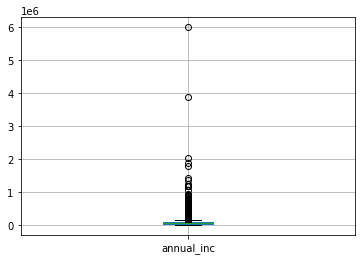

In [21]:
# outlier - annual_inc
df_loan.boxplot(column = 'annual_inc')
plt.show()

In [22]:
# checking for different quantile values to identify the outliers
df_loan.annual_inc.quantile([.75, .80, .85, .90, .95])

0.75     82000.0
0.80     90000.0
0.85    100000.0
0.90    115000.0
0.95    140004.0
Name: annual_inc, dtype: float64

In [23]:
# jump in the value after 90th percentile is huge hence we may consider the values greater than 115000 as outliers
df_loan_annual_inc_upto_115000 = df_loan[~(df_loan.annual_inc > 115000)]

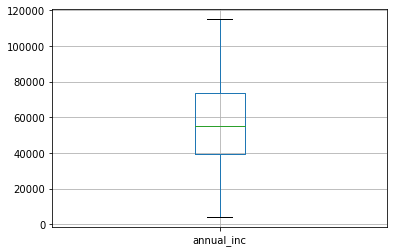

In [24]:
# assigning a shorter variable name
df_work = df_loan_annual_inc_upto_115000

df_work.boxplot(column = 'annual_inc')
plt.show()

# Data Analysis

## Univariate analysis for categorical unordered variables

In [25]:
# function to plot bar charts for categorical unordered variables
def plot_barchart(dataframe, col):
    ((dataframe[col].value_counts()/len(dataframe))*100).plot.bar(figsize=(20, 10))

    plt.xlabel(col, fontdict={'fontsize': 20, 'fontweight' : 10, 'color' : 'Brown'})
    plt.ylabel("Percentage", fontdict={'fontsize': 20, 'fontweight' : 10, 'color' : 'Brown'})

    plt.show()

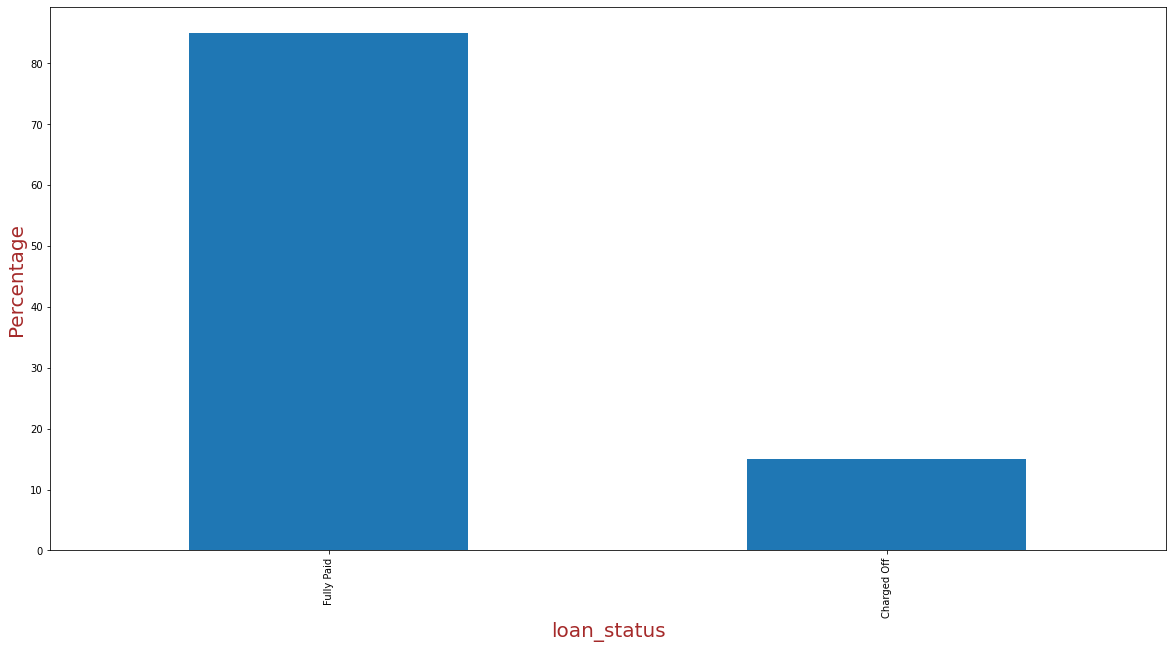

In [26]:
# for loan status variable
plot_barchart(df_work, 'loan_status')

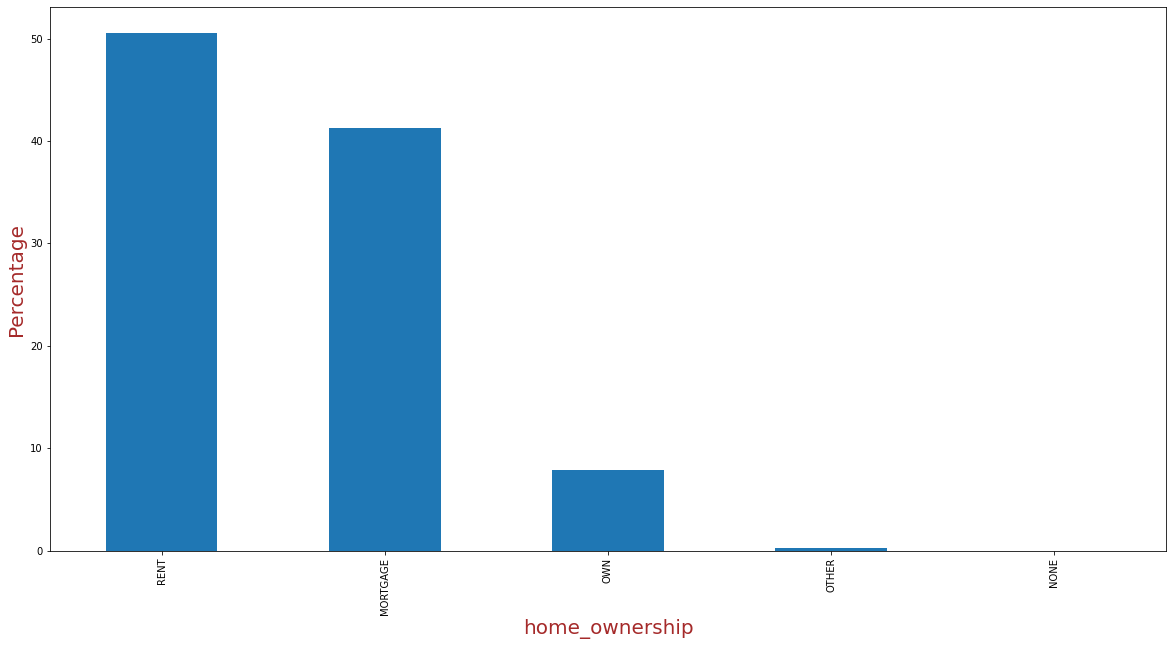

In [27]:
# for home ownership variable
plot_barchart(df_work, 'home_ownership')

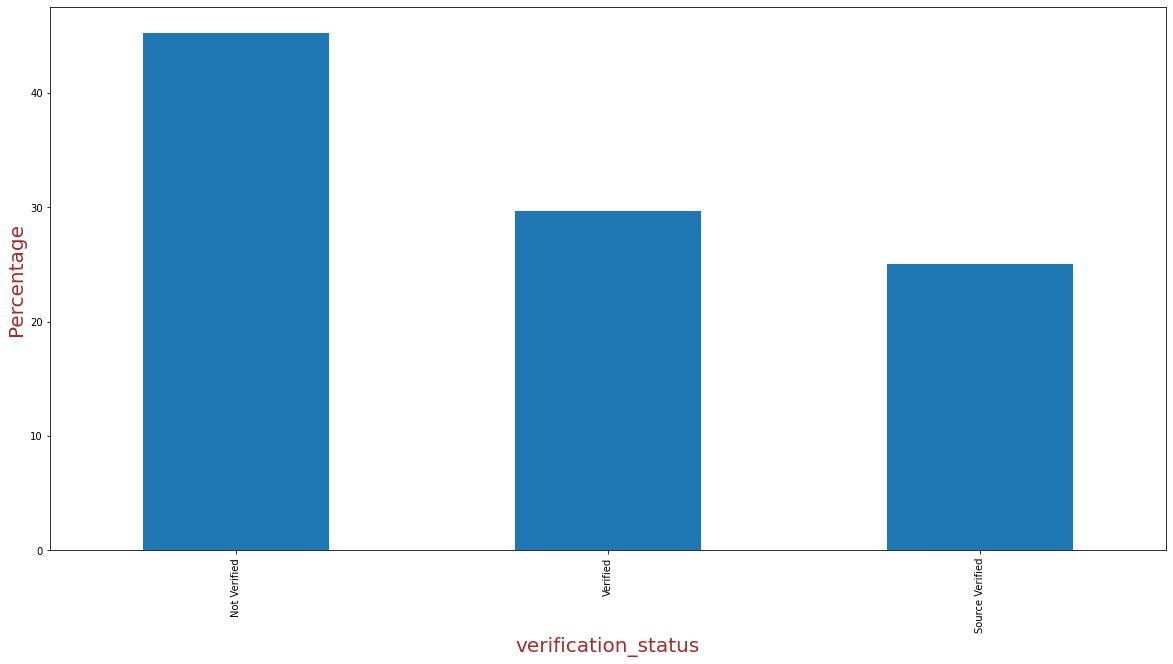

In [28]:
# for verification status variable
plot_barchart(df_work, 'verification_status')

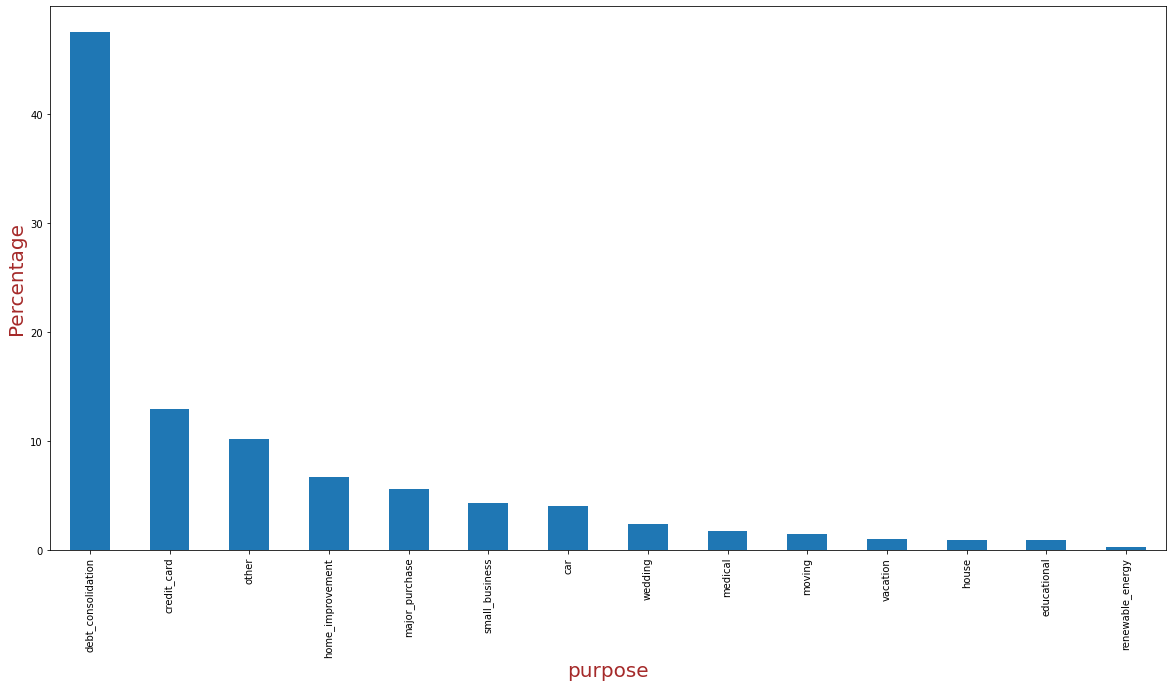

In [29]:
# for purpose variable
plot_barchart(df_work, 'purpose')

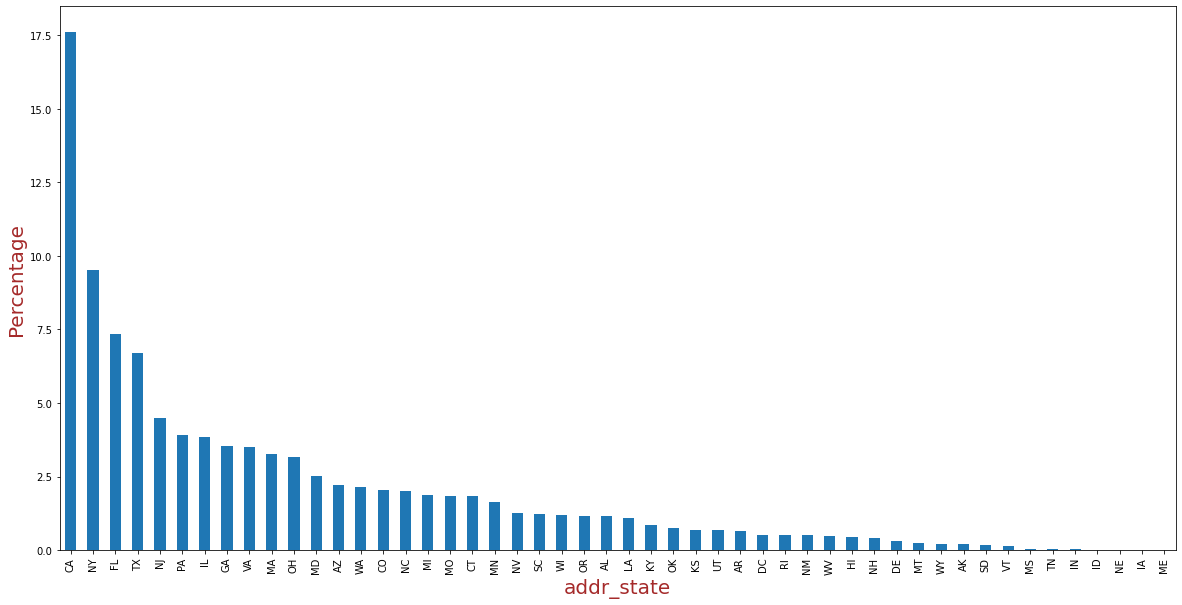

In [30]:
# for state variable
plot_barchart(df_work, 'addr_state')

## Univariate analysis for categorical ordered variables

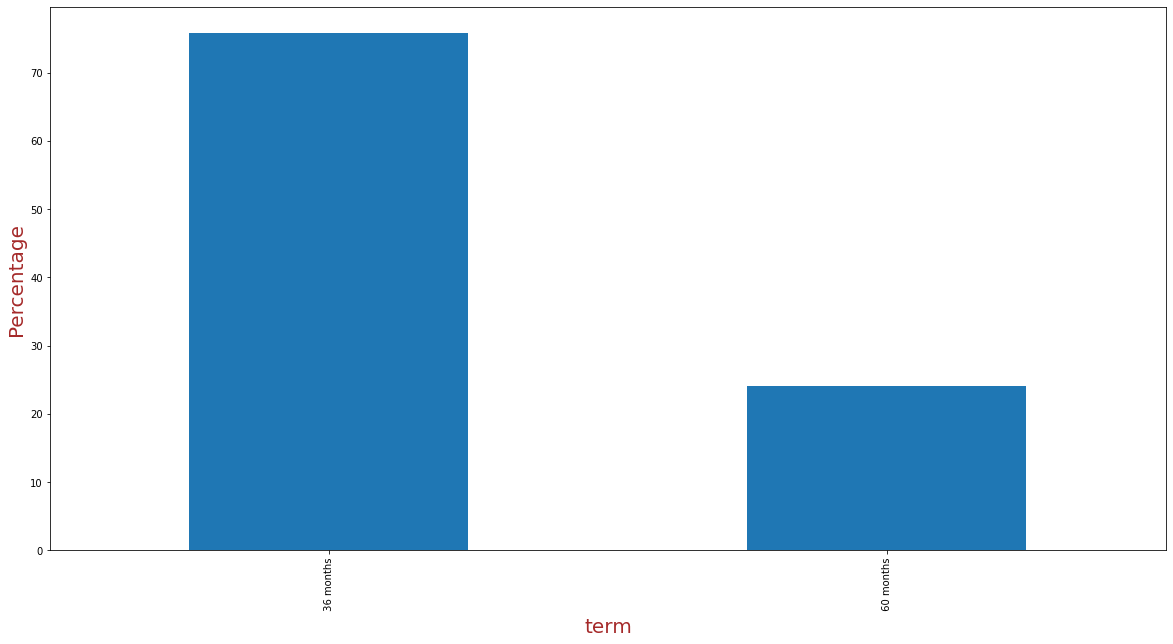

In [31]:
# for term variable
plot_barchart(df_work, 'term')

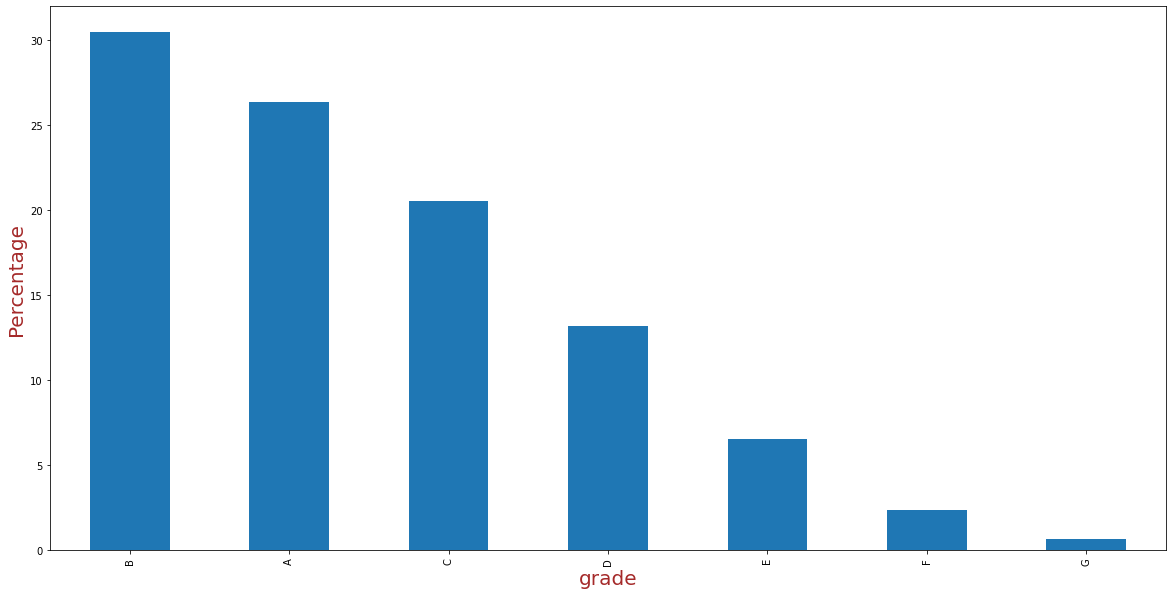

In [32]:
# for grade variable
plot_barchart(df_work, 'grade')

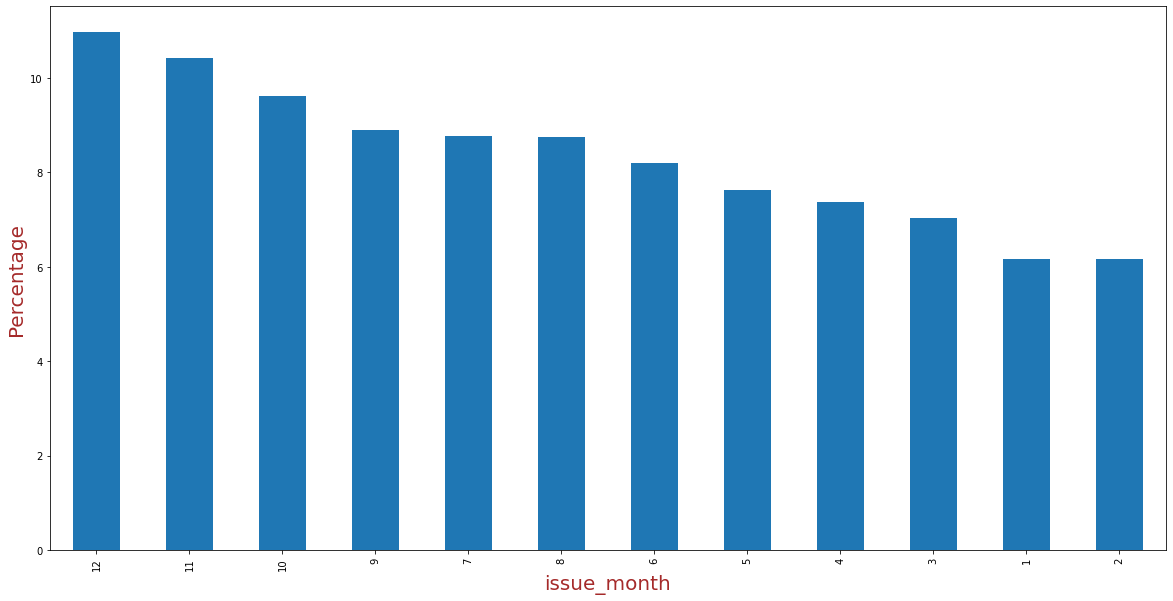

In [33]:
# for loan issue month variable
plot_barchart(df_work, 'issue_month')

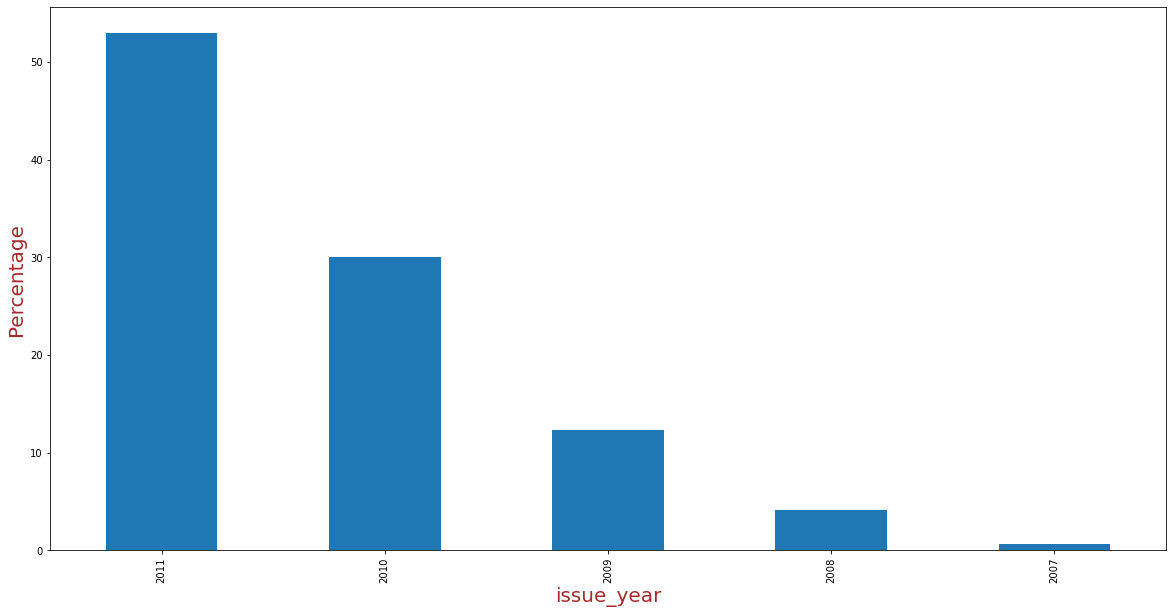

In [34]:
# for loan issue year variable
plot_barchart(df_work, 'issue_year')

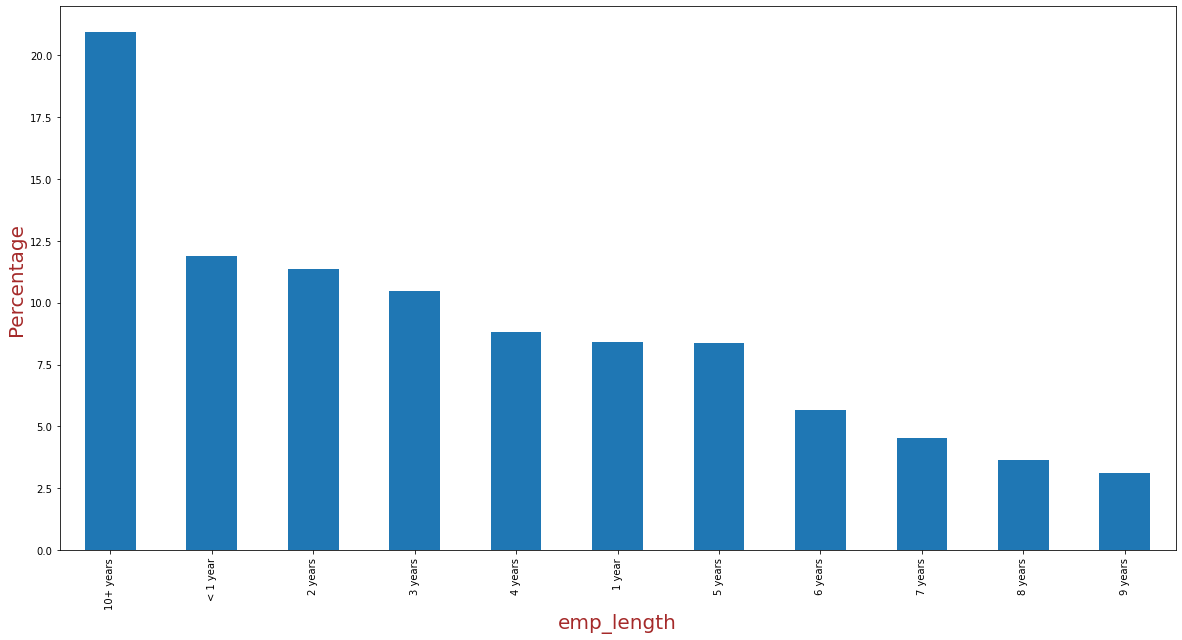

In [35]:
# for employment length variable
plot_barchart(df_work, 'emp_length')

## Univariate analysis for numeric variables which are treated as categorical ordered variables

In [36]:
# function to plot histogram charts
def plot_histogramchart(dataframe, col):
    plt.hist(dataframe[col], bins = 10, edgecolor='Orange', color='cyan')

    plt.xlabel(col, fontdict={'fontsize': 20, 'fontweight' : 10, 'color' : 'Brown'})
    plt.ylabel("Count", fontdict={'fontsize': 20, 'fontweight' : 10, 'color' : 'Brown'})

    plt.show()

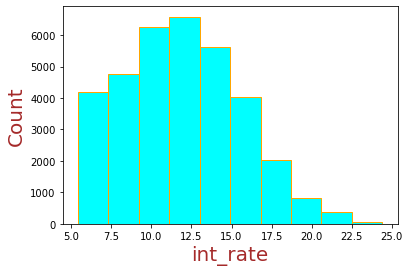

In [37]:
# for interest rate variable
plot_histogramchart(df_work, 'int_rate')

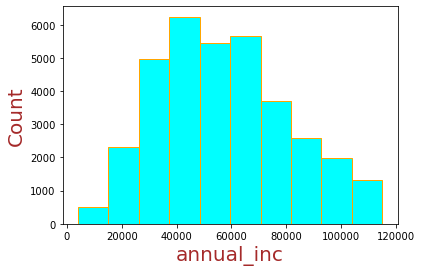

In [38]:
# for annunal income variable
plot_histogramchart(df_work, 'annual_inc')

## Univariate analysis for numeric variables 

In [39]:
# statistical summary across numeric variables
df_work.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,pub_rec_bankruptcies,issue_month,issue_year
count,34723.000000,34723.000000,34723.000000,34723.000000,34723.000000,34723.000000,34723.000000,34098.000000,34723.000000,34723.000000
mean,10401.734441,10171.489359,9641.689510,11.862169,303.929424,57209.940431,13.543985,0.045369,7.104311,2010.306368
std,6841.975136,6606.930229,6537.101329,3.644937,192.888646,23615.526637,6.675047,0.208819,3.412445,0.882682
min,500.000000,500.000000,0.000000,5.420000,15.690000,4000.000000,0.000000,0.000000,1.000000,2007.000000
25%,5000.000000,5000.000000,4945.220654,8.940000,161.060000,39600.000000,8.450000,0.000000,4.000000,2010.000000
50%,9000.000000,8975.000000,8000.000000,11.710000,263.500000,54912.000000,13.710000,0.000000,7.000000,2011.000000
75%,14400.000000,14000.000000,13000.000000,14.270000,399.430000,73600.000000,18.840000,0.000000,10.000000,2011.000000
max,35000.000000,35000.000000,35000.000000,24.400000,1302.690000,115000.000000,29.990000,2.000000,12.000000,2011.000000


## Segmented univariate analysis - comparing mean

In [40]:
# function to calulate and print: 
# - the mean of a numeric variable for all it's values
# - the mean of same numeric variable based on loan status

def seg_uni(dataframe, col, variable_name):
    print('Mean of total',variable_name,': %.2f' % dataframe[col].mean())
    print('\n')
    print('Mean of',variable_name,'based on loan status:')
    print('---------------------------------------------')
    print(dataframe.groupby('loan_status')[col].mean().round(decimals = 2))

In [41]:
# for loan amount variable
seg_uni(df_work, 'loan_amnt', 'loan amount')

Mean of total loan amount : 10401.73


Mean of loan amount based on loan status:
---------------------------------------------
loan_status
Charged Off    11541.25
Fully Paid     10201.12
Name: loan_amnt, dtype: float64


In [42]:
# for funded amount variable
seg_uni(df_work, 'funded_amnt', 'funded amount')

Mean of total funded amount : 10171.49


Mean of funded amount based on loan status:
---------------------------------------------
loan_status
Charged Off    11228.40
Fully Paid      9985.42
Name: funded_amnt, dtype: float64


In [43]:
# for funded amount by investor variable 
seg_uni(df_work, 'funded_amnt_inv', 'funded amount by investor')

Mean of total funded amount by investor : 9641.69


Mean of funded amount by investor based on loan status:
---------------------------------------------
loan_status
Charged Off    10380.31
Fully Paid      9511.65
Name: funded_amnt_inv, dtype: float64


In [44]:
# for interest rate
seg_uni(df_work, 'int_rate', 'interest rate')

Mean of total interest rate : 11.86


Mean of interest rate based on loan status:
---------------------------------------------
loan_status
Charged Off    13.72
Fully Paid     11.54
Name: int_rate, dtype: float64


In [45]:
# for installment variable
seg_uni(df_work, 'installment', 'installment')

Mean of total installment : 303.93


Mean of installment based on loan status:
---------------------------------------------
loan_status
Charged Off    320.39
Fully Paid     301.03
Name: installment, dtype: float64


In [46]:
# for annual income variable
seg_uni(df_work, 'annual_inc', 'annual income')

Mean of total annual income : 57209.94


Mean of annual income based on loan status:
---------------------------------------------
loan_status
Charged Off    53491.46
Fully Paid     57864.59
Name: annual_inc, dtype: float64


In [47]:
# for debt to income ratio variable
seg_uni(df_work, 'dti', 'debt to income ratio')

Mean of total debt to income ratio : 13.54


Mean of debt to income ratio based on loan status:
---------------------------------------------
loan_status
Charged Off    14.17
Fully Paid     13.43
Name: dti, dtype: float64


In [48]:
# for public record of bankruptcies variable
seg_uni(df_work, 'pub_rec_bankruptcies', 'public record of bankruptcies')

Mean of total public record of bankruptcies : 0.05


Mean of public record of bankruptcies based on loan status:
---------------------------------------------
loan_status
Charged Off    0.07
Fully Paid     0.04
Name: pub_rec_bankruptcies, dtype: float64


### Observation: With public record of bankruptcies, there is a higher chance of defaulting the loan 

## Segmented univariate analysis - comparing other metrics

In [49]:
# function to plot boxplot for numeric variables grouped by loan status

def plot_boxplot(dataframe, col):
    dataframe.boxplot(column=col, by='loan_status', figsize = (10,5))
    plt.show()

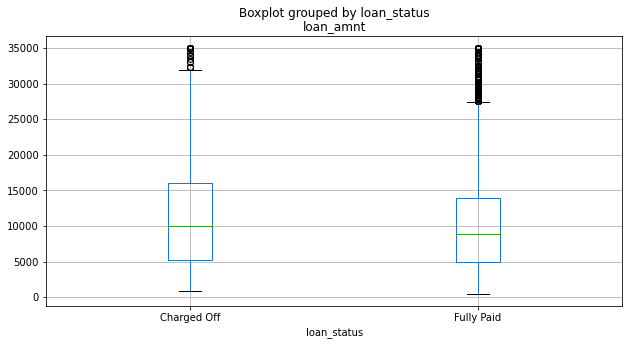

In [50]:
# loan amount grouped by loan status
plot_boxplot(df_work, 'loan_amnt')

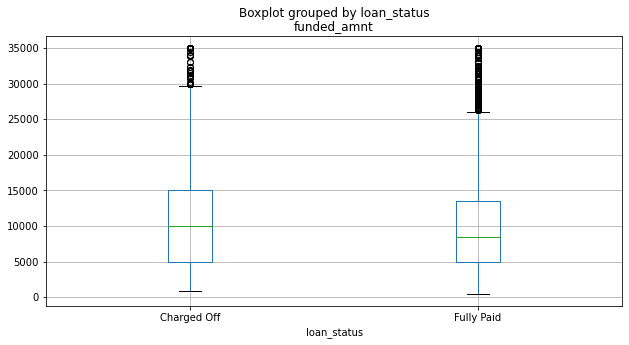

In [51]:
# funded amount grouped by loan status
plot_boxplot(df_work, 'funded_amnt')

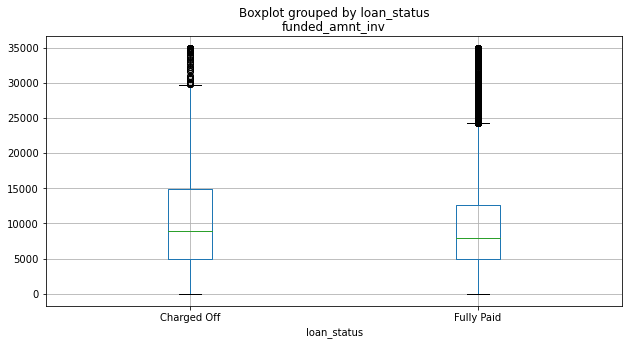

In [52]:
# funded amount by investor grouped by loan status
plot_boxplot(df_work, 'funded_amnt_inv')

### Observation: Though at the lower level of fund amount given by investors, loan defaults are almost equal to loan paid but at the higher amounts, loan defaults are high

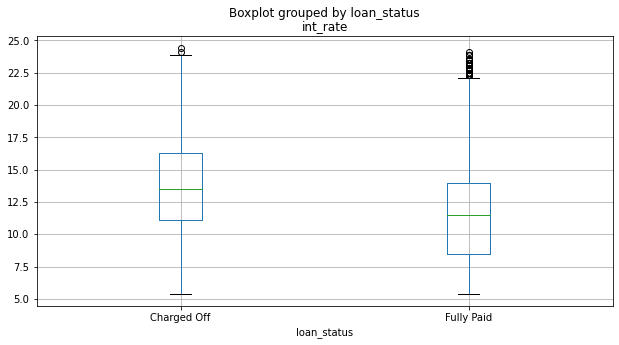

In [53]:
# interest rate grouped by loan status
plot_boxplot(df_work, 'int_rate')

### Observation: Defaults are more with higher interest rate

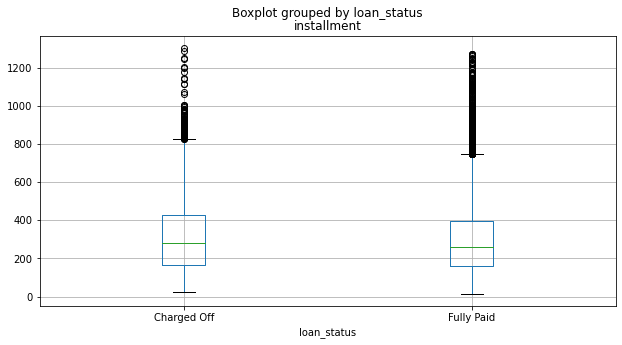

In [54]:
# installment grouped by loan status
plot_boxplot(df_work, 'installment')

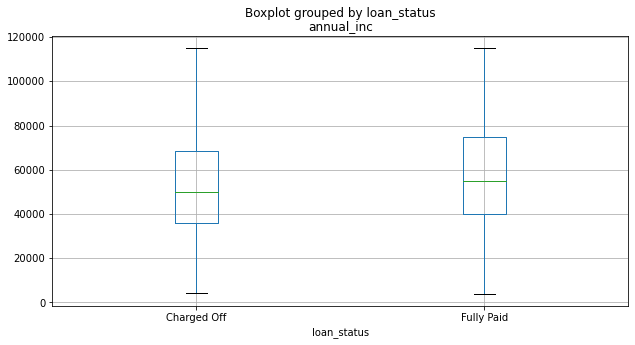

In [55]:
# annual income grouped by loan status
plot_boxplot(df_work, 'annual_inc')

### Observation: Lower income tend to have more defaults

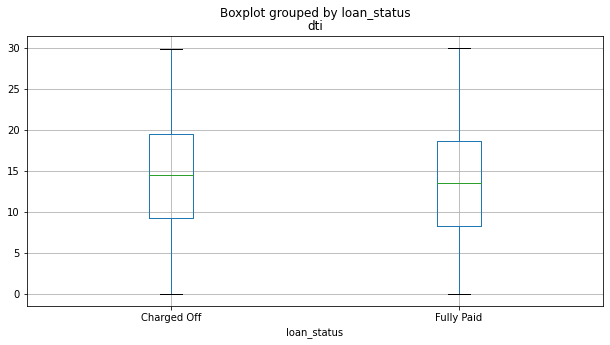

In [56]:
# debt to income ratio grouped by loan status
plot_boxplot(df_work, 'dti')

### Observation: If debt to income ratio is higher than more chances of defaulting the loan

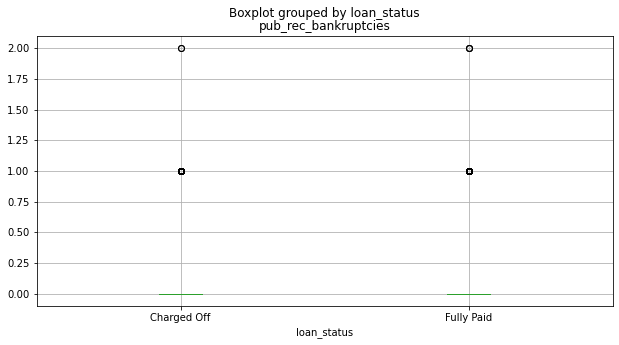

In [57]:
# public record of bankruptcies grouped by loan status
plot_boxplot(df_work, 'pub_rec_bankruptcies')

## Bivariate analysis

In [58]:
# function to plot comparative bar chart to analyse the impact of different categorical variables on loan status

def plot_comp_barchart(dataframe, col):
    df_temp = dataframe[['loan_status', col]]
    df_temp1 = pd.pivot_table(df_temp, index=[col], columns=['loan_status'], aggfunc = 'size')
    df_temp1[['Charged Off', 'Fully Paid']].apply(lambda x: (x/x.sum())*100, axis = 1).plot(kind = 'bar', ylabel = 'Percentage', figsize = (10, 5))
    plt.legend(loc='upper right')
    plt.show()

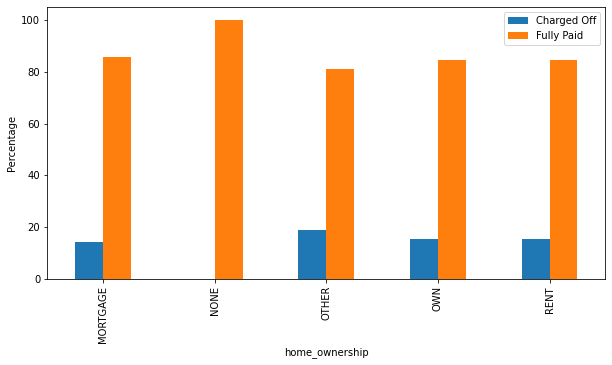

In [59]:
# home ownership and loan status
plot_comp_barchart(df_work, 'home_ownership')

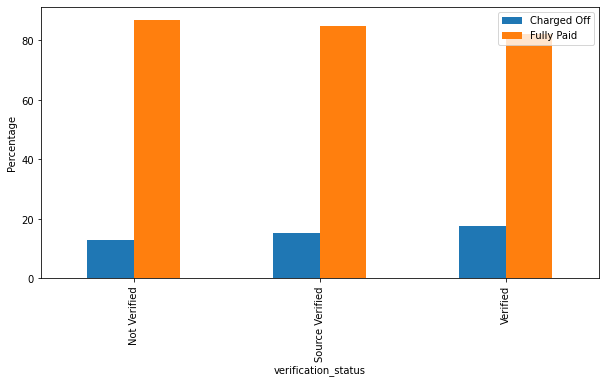

In [60]:
# verification status and loan status
plot_comp_barchart(df_work, 'verification_status')

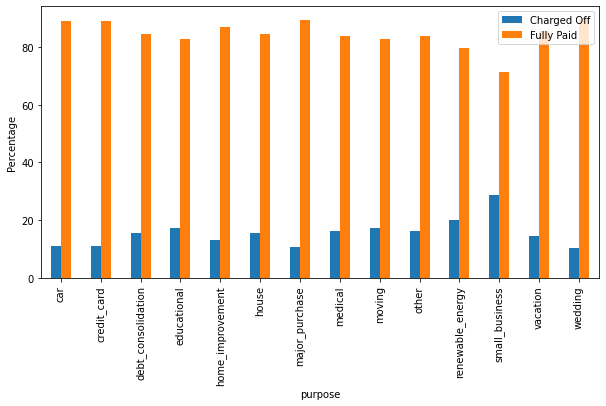

In [61]:
# purpose and loan status
plot_comp_barchart(df_work, 'purpose')

### Observation: High chances of defaulting the loan if it is taken for small business

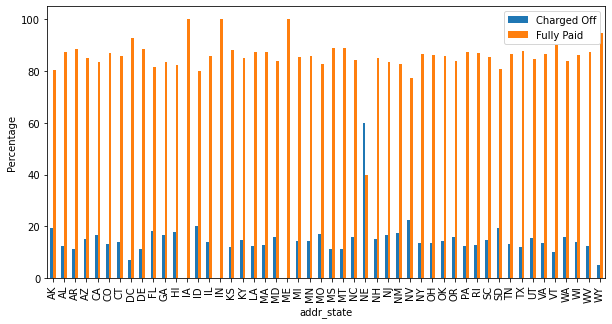

In [62]:
# state and loan status
plot_comp_barchart(df_work, 'addr_state')

### Observation: Borrowers from nebraska have the highest default rate compare to any other state

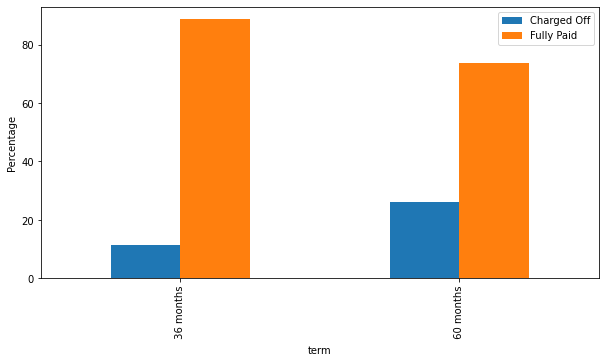

In [63]:
# term and loan status
plot_comp_barchart(df_work, 'term')

### Observation: High chances of defaulting the loan if payment term is 60 months

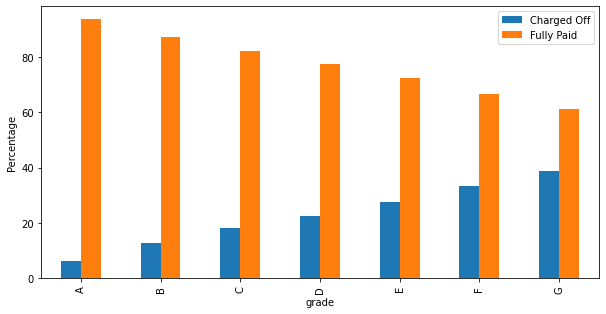

In [64]:
# grade and loan status 
plot_comp_barchart(df_work, 'grade') 

### Observation: Lower the grade, higher the chance of defaulting the loan

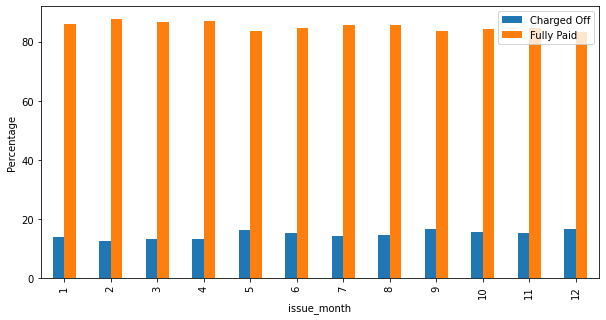

In [65]:
# loan issue month and loan status
plot_comp_barchart(df_work, 'issue_month')

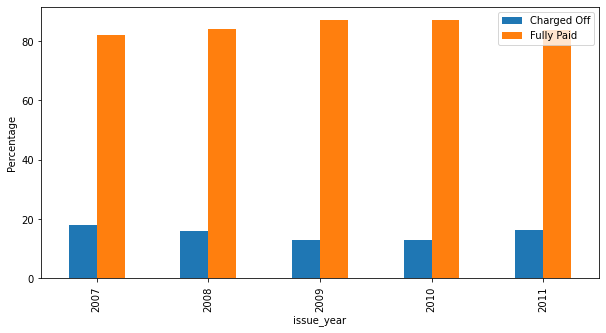

In [66]:
# loan issue year and loan status
plot_comp_barchart(df_work, 'issue_year')

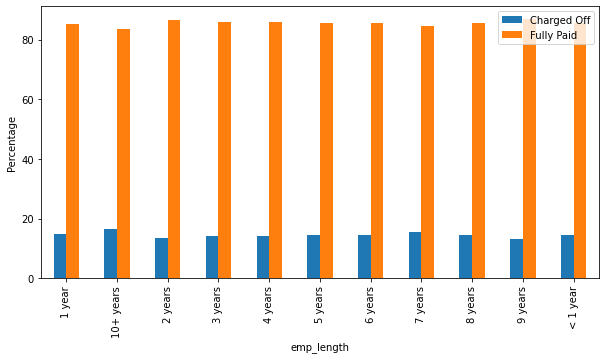

In [67]:
# employment length and loan status
plot_comp_barchart(df_work, 'emp_length')

## Type Driven Metrics
### As per Steven's topology, following is the classification of different variables:

### Nominal Variables - emp_title, home_ownership, verification_status, loan_status, purpose, addr_state

### Ordinal Variables - grade, subgrade

### Interval Variables - issue_month, issue_year (this is type driven metrics which I derived from issue_date)

### Ratio Variables - loan_amnt, funded_amnt, funded_amnt_inv, annual_inc

## Business Driven Metrics
### Defaulter or not? - this can be derived based on the loan_status column

## Data Driven Metrics
### Based on the outliers for annual income data, another columm "outlier or not?" can be created

### I have not created such column during my analysis but I have used the outlier data from annual income to remove the data rows and conduct the final analysis

# Five strong indicators of loan default are:
## grade
## interest rate
## debt to income ratio
## public record of bankruptcies
## term

# Please refer presentation for recommendations